
🔄 Analyzing IOWait...


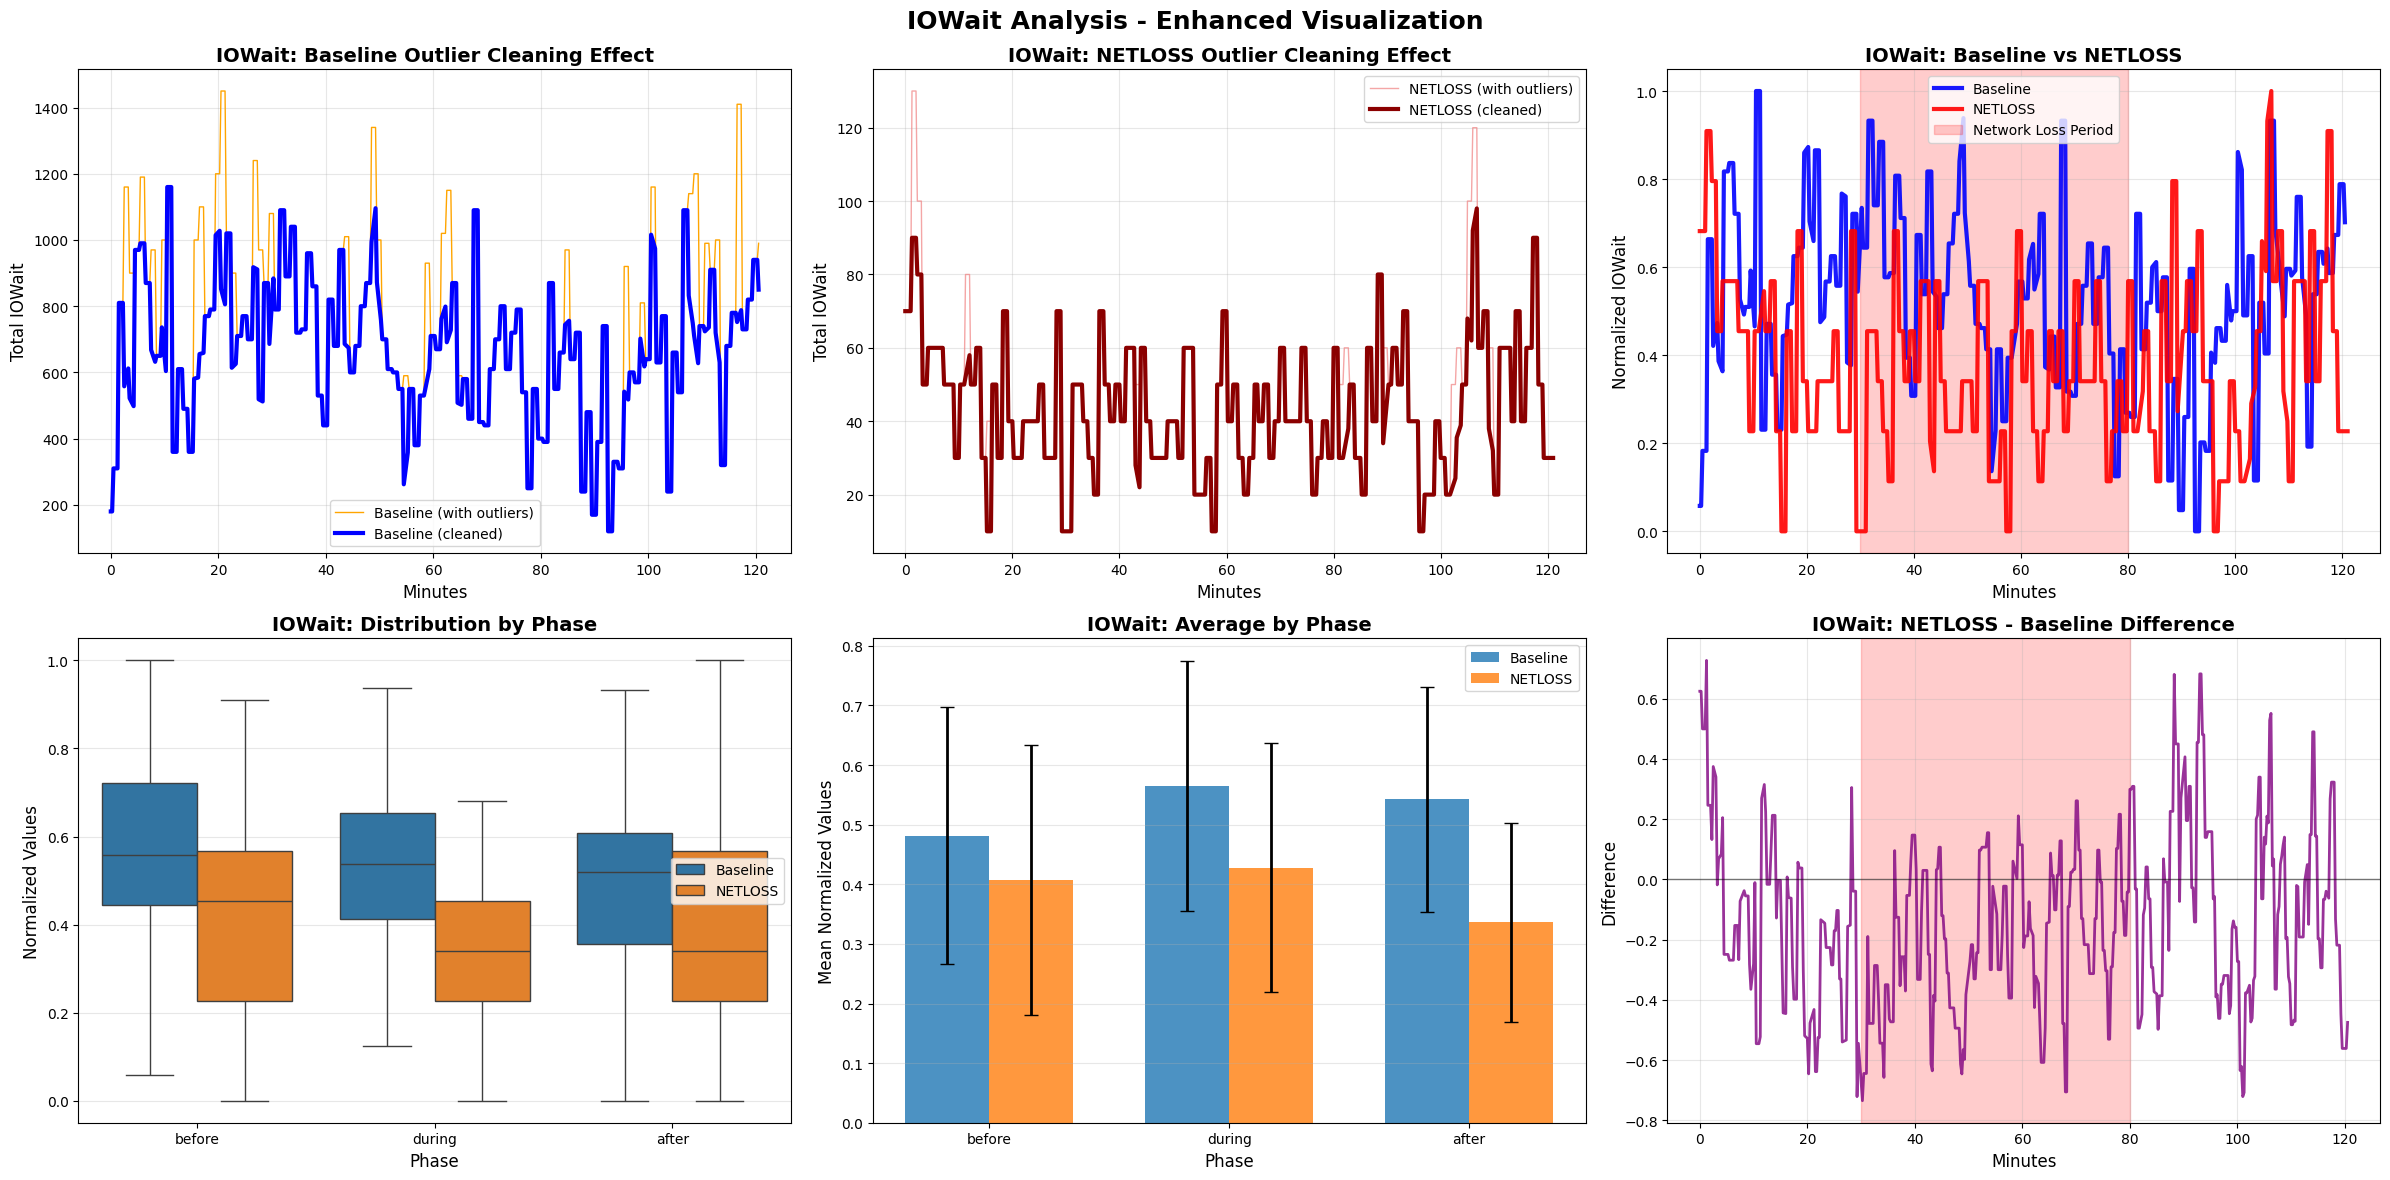


IOWAIT - STATISTICAL ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4818  0.2161  0.0000  0.9327
before  0.5646  0.2093  0.0577  1.0000
during  0.5425  0.1884  0.1250  0.9385

📊 NETLOSS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.4074  0.2269  0.0  1.0000
before  0.4280  0.2090  0.0  0.9091
during  0.3364  0.1672  0.0  0.6818

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.06, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 11.60, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=  2.93, p=  0.0037 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT (% CHANGE):
  BEFORE  :  -24.18% (↘️ DECREASE)
  DURING  :  -37.99% (↘️ DECREASE)
  AFTER   :  -15.43% (↘️ DECREASE)

🔄 Analyzing IRQ...


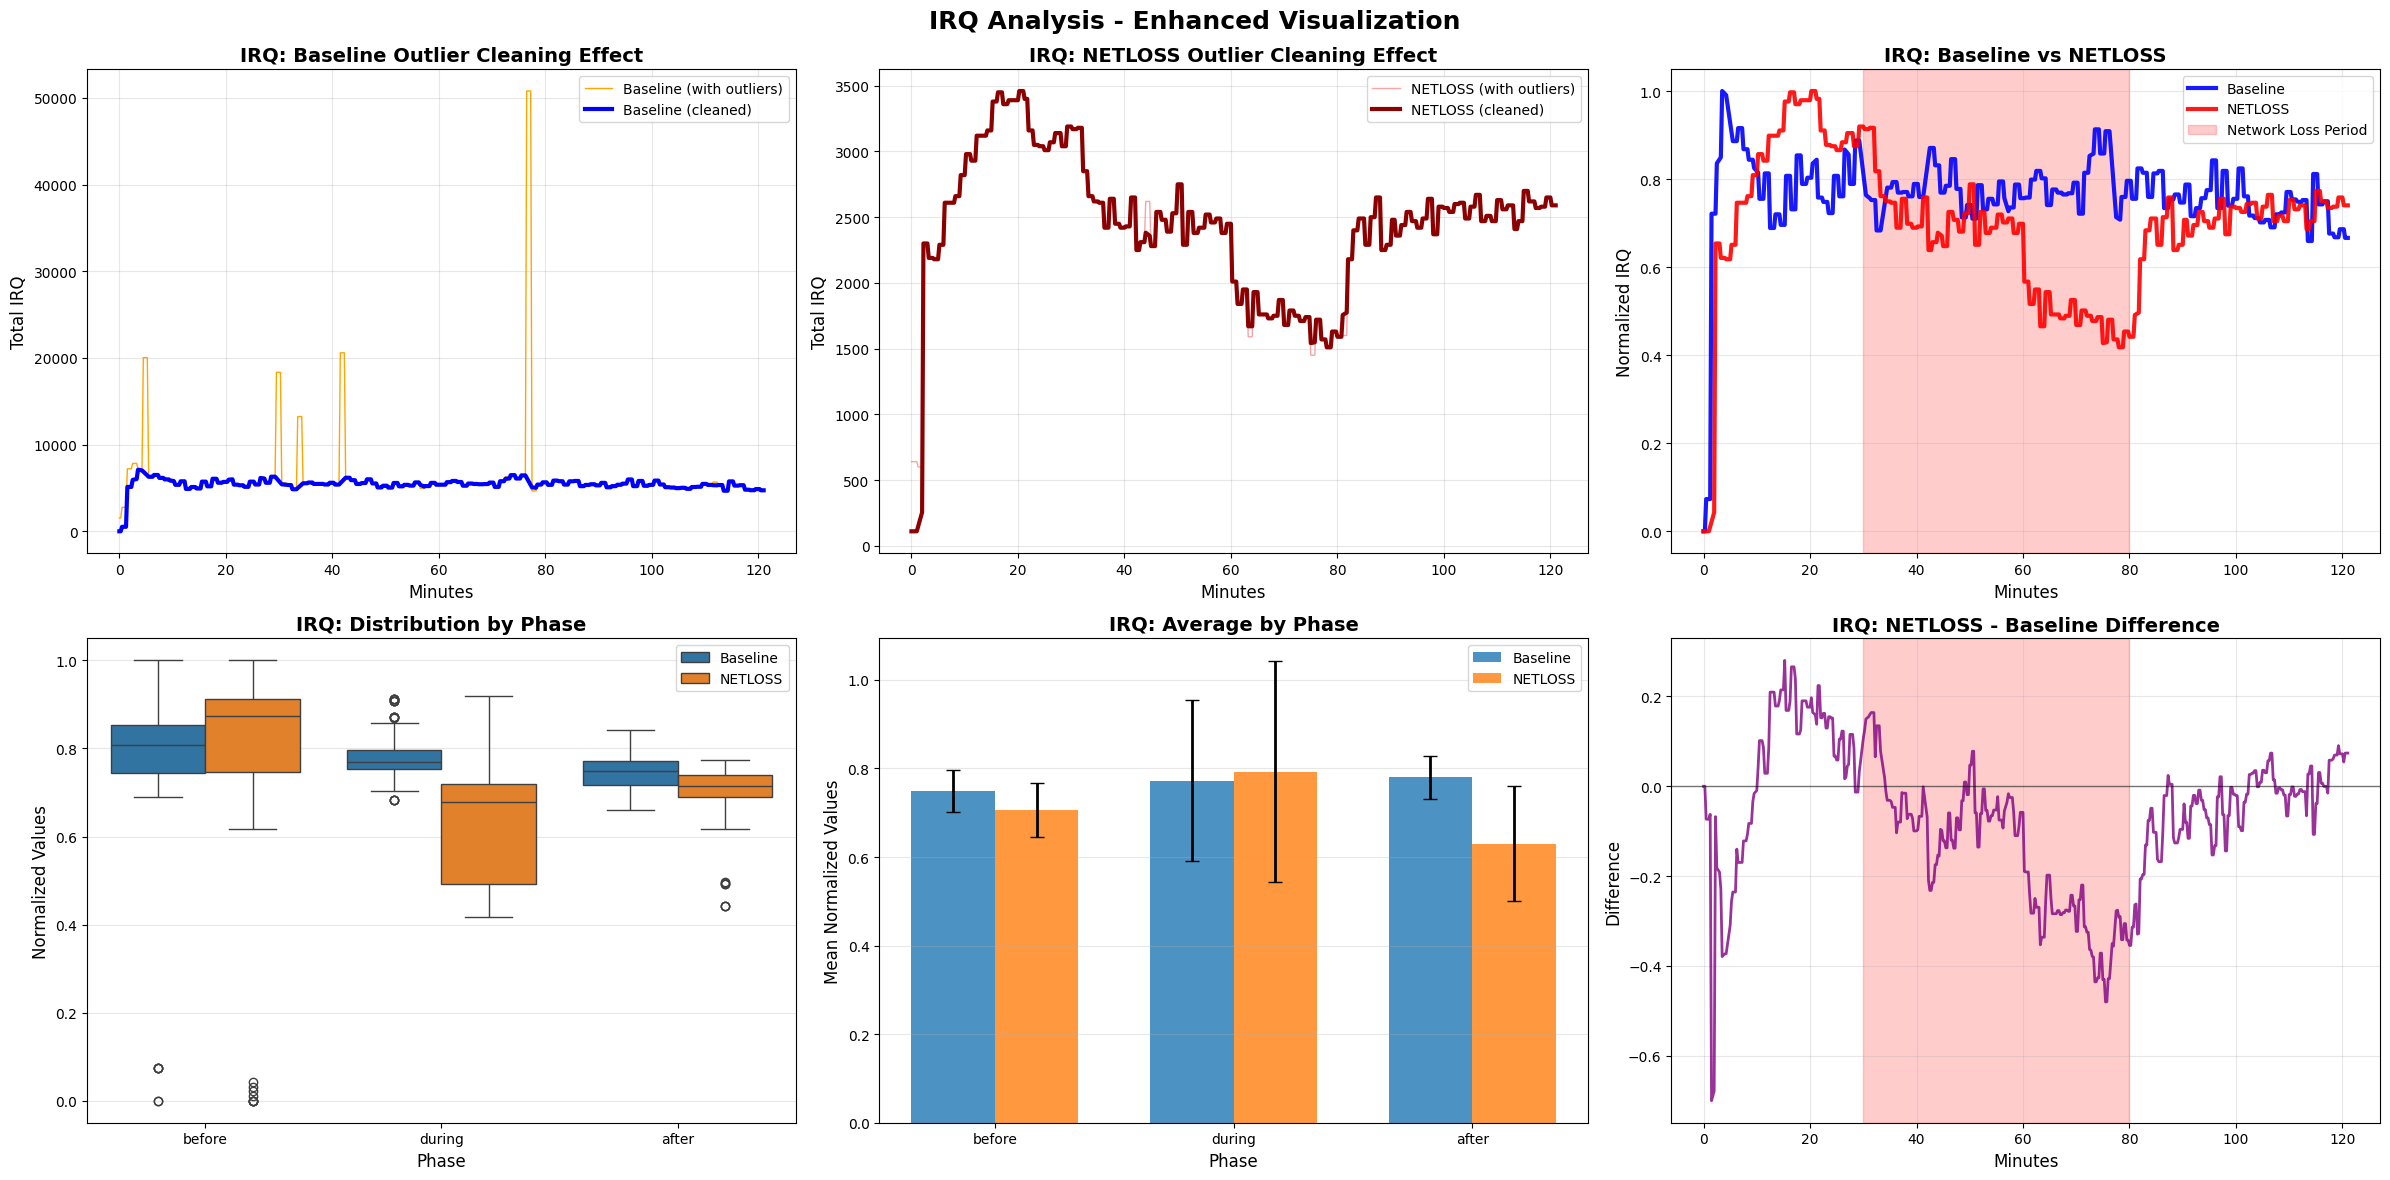


IRQ - STATISTICAL ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.7492  0.0465  0.6594  0.8425
before  0.7721  0.1819  0.0000  1.0000
during  0.7796  0.0481  0.6833  0.9130

📊 NETLOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.7053  0.0609  0.4418  0.7731
before  0.7928  0.2488  0.0000  1.0000
during  0.6304  0.1299  0.4179  0.9194

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -0.74, p=  0.4622 (❌ NOT SIGNIFICANT)
  DURING  : t= 15.28, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=  7.34, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT (% CHANGE):
  BEFORE  :   +2.68% (↗️ INCREASE)
  DURING  :  -19.15% (↘️ DECREASE)
  AFTER   :   -5.86% (↘️ DECREASE)

🔄 Analyzing System...


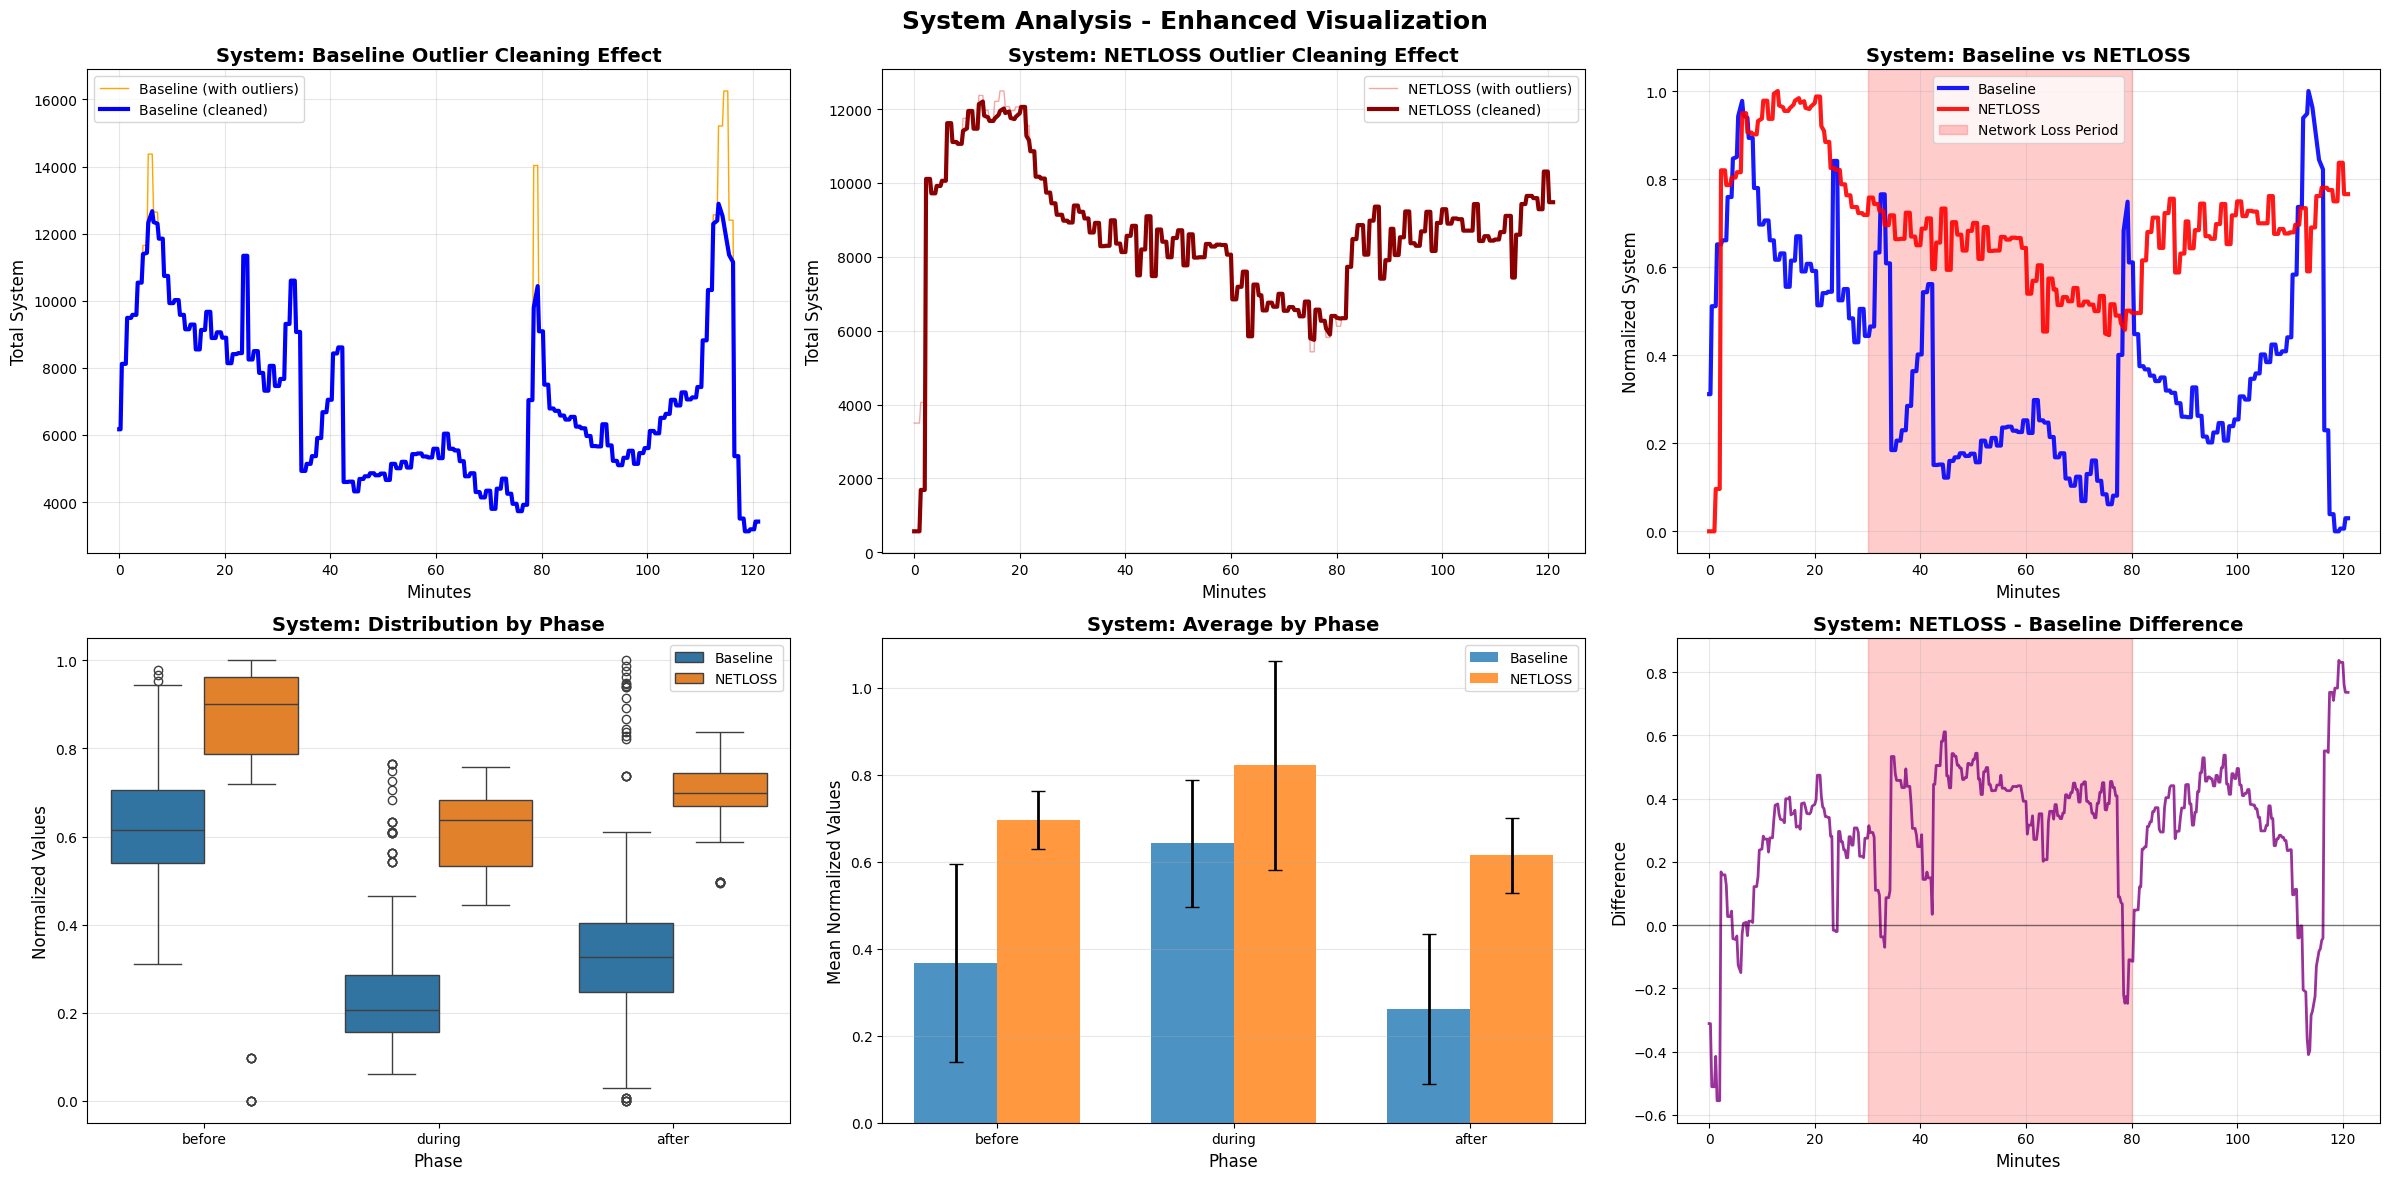


SYSTEM - STATISTICAL ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.3673  0.2274  0.0000  1.0000
before  0.6419  0.1458  0.3115  0.9775
during  0.2605  0.1725  0.0615  0.7654

📊 NETLOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6963  0.0664  0.4948  0.8371
before  0.8210  0.2391  0.0000  1.0000
during  0.6143  0.0863  0.4455  0.7580

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -7.01, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=-26.00, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=-17.78, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT (% CHANGE):
  BEFORE  :  +27.91% (↗️ INCREASE)
  DURING  : +135.82% (↗️ INCREASE)
  AFTER   :  +89.57% (↗️ INCREASE)

🔄 Analyzing User...


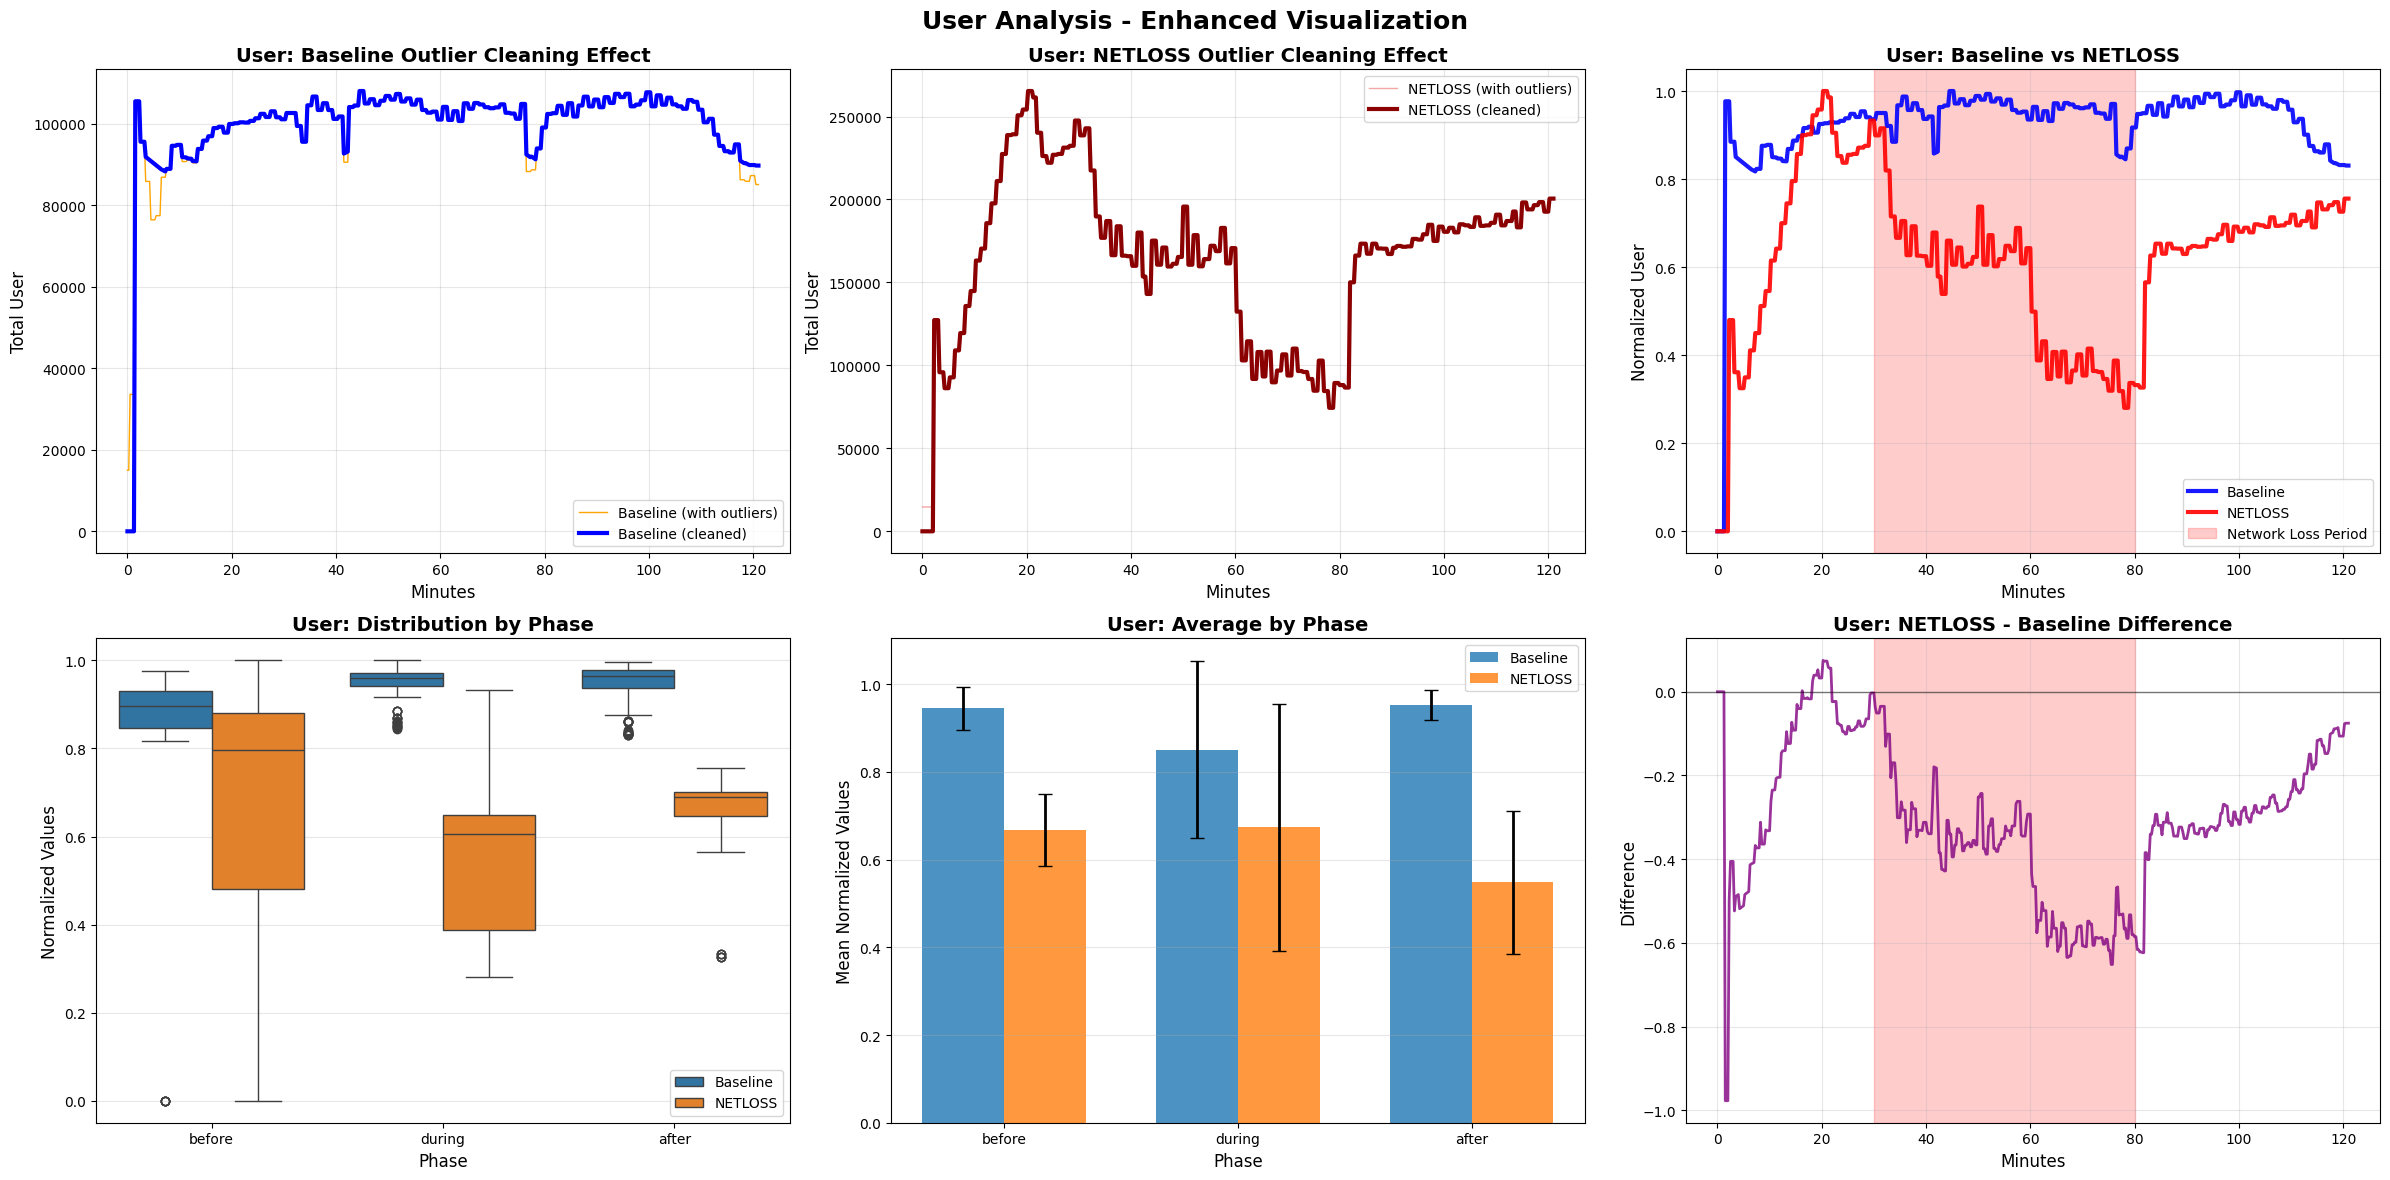


USER - STATISTICAL ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9451  0.0493  0.8307  0.9971
before  0.8510  0.2008  0.0000  0.9767
during  0.9519  0.0346  0.8450  1.0000

📊 NETLOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6671  0.0815  0.3264  0.7557
before  0.6734  0.2816  0.0000  1.0000
during  0.5483  0.1625  0.2804  0.9329

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.62, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 34.44, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= 37.36, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT (% CHANGE):
  BEFORE  :  -20.87% (↘️ DECREASE)
  DURING  :  -42.39% (↘️ DECREASE)
  AFTER   :  -29.41% (↘️ DECREASE)

🔄 Analyzing Utilization...


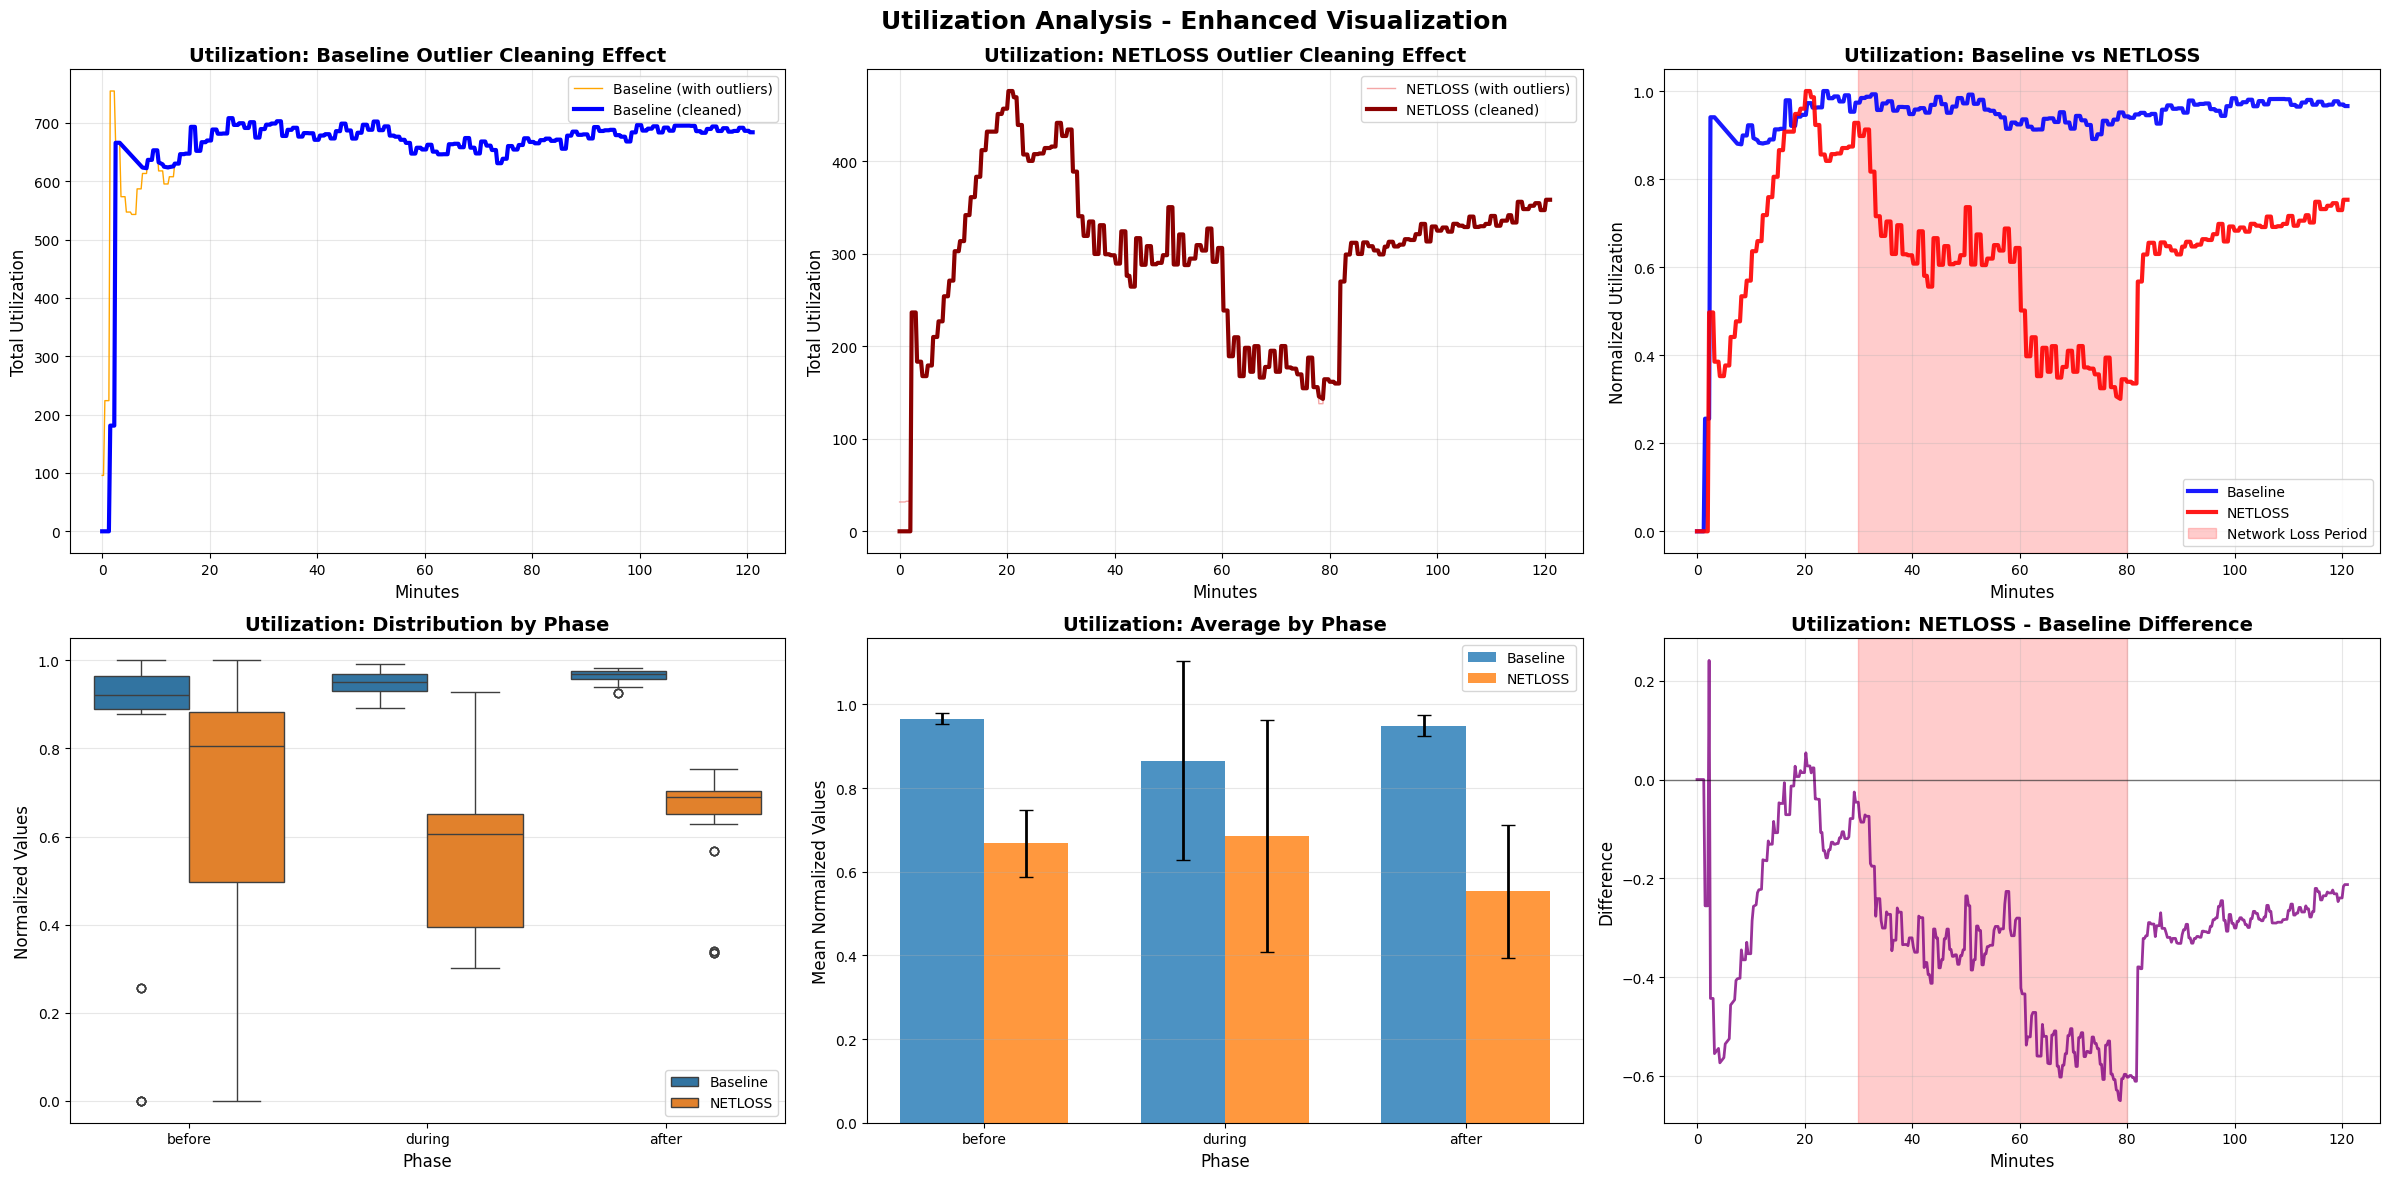


UTILIZATION - STATISTICAL ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std    min     max
phase                                
after   0.9655  0.0134  0.926  0.9836
before  0.8658  0.2368  0.000  1.0000
during  0.9489  0.0247  0.891  0.9925

📊 NETLOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6681  0.0798  0.3356  0.7530
before  0.6844  0.2772  0.0000  1.0000
during  0.5531  0.1585  0.3008  0.9277

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.45, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 34.98, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= 47.09, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT (% CHANGE):
  BEFORE  :  -20.95% (↘️ DECREASE)
  DURING  :  -41.71% (↘️ DECREASE)
  AFTER   :  -30.80% (↘️ DECREASE)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats

# Load all datasets
df_iowait = pd.read_csv("cpu_iowait.csv")
df_cpu_irq = pd.read_csv("cpu_irq.csv")
df_system_msec = pd.read_csv("cpu_system_msec.csv")
df_user_msec = pd.read_csv("cpu_user_msec.csv")
df_cpu_util = pd.read_csv("cpu_util_per.csv")

df_baseline_iowait = pd.read_csv("../../baseline/cpu related/cpu_iowait.csv")
df_baseline_irq = pd.read_csv("../../baseline/cpu related/cpu_irq.csv")
df_baseline_system_msec = pd.read_csv("../../baseline/cpu related/cpu_system_msec.csv")
df_baseline_user_msec = pd.read_csv("../../baseline/cpu related/cpu_user_msec.csv")
df_baseline_util_per = pd.read_csv("../../baseline/cpu related/cpu_util_per.csv")

# Add source labels
df_iowait["source"] = "NETLOSS"
df_cpu_irq["source"] = "NETLOSS"
df_system_msec["source"] = "NETLOSS"
df_user_msec["source"] = "NETLOSS"
df_cpu_util["source"] = "NETLOSS"

df_baseline_iowait["source"] = "BASELINE"
df_baseline_irq["source"] = "BASELINE"
df_baseline_system_msec["source"] = "BASELINE"
df_baseline_user_msec["source"] = "BASELINE"
df_baseline_util_per["source"] = "BASELINE"

# Convert to datetime
df_iowait["Time"] = pd.to_datetime(df_iowait["Time"])
df_cpu_irq["Time"] = pd.to_datetime(df_cpu_irq["Time"])
df_system_msec["Time"] = pd.to_datetime(df_system_msec["Time"])
df_user_msec["Time"] = pd.to_datetime(df_user_msec["Time"])
df_cpu_util["Time"] = pd.to_datetime(df_cpu_util["Time"])

df_baseline_iowait["Time"] = pd.to_datetime(df_baseline_iowait["Time"])
df_baseline_irq["Time"] = pd.to_datetime(df_baseline_irq["Time"])
df_baseline_system_msec["Time"] = pd.to_datetime(df_baseline_system_msec["Time"]) 
df_baseline_user_msec["Time"] = pd.to_datetime(df_baseline_user_msec["Time"])
df_baseline_util_per["Time"] = pd.to_datetime(df_baseline_util_per["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_iowait["Time"].min() - df_iowait["Time"].min()
df_iowait["Time"] += time_offset
df_cpu_irq["Time"] += time_offset
df_system_msec["Time"] += time_offset
df_user_msec["Time"] += time_offset
df_cpu_util["Time"] += time_offset

# Convert timeline to minutes 
all_dfs = [
    df_iowait, df_cpu_irq, df_system_msec, df_user_msec, df_cpu_util,
    df_baseline_iowait, df_baseline_irq, df_baseline_system_msec, 
    df_baseline_user_msec, df_baseline_util_per
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# ORIGINAL DATASETS DICTIONARY 
original_datasets = {
    'IOWait': {'netloss': df_iowait, 'baseline': df_baseline_iowait},
    'IRQ': {'netloss': df_cpu_irq, 'baseline': df_baseline_irq},
    'System': {'netloss': df_system_msec, 'baseline': df_baseline_system_msec},
    'User': {'netloss': df_user_msec, 'baseline': df_baseline_user_msec},
    'Utilization': {'netloss': df_cpu_util, 'baseline': df_baseline_util_per}
}

# OUTLIER DETECTION AND CLEANING
def remove_outliers_comprehensive(df, method='iqr', threshold=1.5):
    df_clean = df.copy()
    cpu_cols = [col for col in df.columns if col.startswith('cpu')]
    outlier_stats = {}
    
    if method == 'iqr':
        for col in cpu_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
            
            outlier_stats[col] = {
                'count': outlier_mask.sum(),
                'percentage': (outlier_mask.sum() / len(df[col])) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Set outliers to NaN and after interpolate
            df_clean.loc[outlier_mask, col] = np.nan
            df_clean[col] = df_clean[col].interpolate(method='linear')
                
    return df_clean, outlier_stats

# APPLY OUTLIER CLEANING
datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        df_clean, stats = remove_outliers_comprehensive(df, method='iqr', threshold=1.5)
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats

# NORMALIZATION FUNCTION
def normalize_df(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# ANALYSIS AND PLOT FUNCTION
def analyze_and_plot_dataset_wide(dataset_name, netloss_df, baseline_df, delay_minutes, duration_minutes):
    cpu_cols = [col for col in netloss_df.columns if col.startswith('cpu')]
    
    netloss_norm = normalize_df(netloss_df, cpu_cols)
    baseline_norm = normalize_df(baseline_df, cpu_cols)
    
    # Calculate cumulative metrics
    netloss_df['Total'] = netloss_df[cpu_cols].sum(axis=1)
    baseline_df['Total'] = baseline_df[cpu_cols].sum(axis=1)
    
    # Normalize totals
    netloss_norm['Total'] = (netloss_df['Total'] - netloss_df['Total'].min()) / (netloss_df['Total'].max() - netloss_df['Total'].min())
    baseline_norm['Total'] = (baseline_df['Total'] - baseline_df['Total'].min()) / (baseline_df['Total'].max() - baseline_df['Total'].min())
    
    # Add phase information
    netloss_norm = add_phase_column(netloss_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')['Total'].agg(['mean', 'std', 'min', 'max'])
    stats_netloss = netloss_norm.groupby('phase')['Total'].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm['Total'],
        'NETLOSS': netloss_norm['Total'],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': netloss_norm['Total'] - baseline_norm['Total']
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['NETLOSS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        netloss_mean = stats_netloss.loc[phase, 'mean']
        impact[phase] = ((netloss_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # PLOTTING
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    original_baseline = original_datasets[dataset_name]['baseline']
    
    plt.plot(original_baseline['Minutes'], original_baseline[cpu_cols].sum(axis=1), 
             label='Baseline (with outliers)', color='orange', linewidth=1)
    plt.plot(baseline_df['Minutes'], baseline_df['Total'], 
             label='Baseline (cleaned)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'Total {dataset_name}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. NETLOSS outlier cleaning effect
    plt.subplot(2, 3, 2)
    original_netloss = original_datasets[dataset_name]['netloss']
    
    plt.plot(original_netloss['Minutes'], original_netloss[cpu_cols].sum(axis=1), 
             label='NETLOSS (with outliers)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(netloss_df['Minutes'], netloss_df['Total'], 
             label='NETLOSS (cleaned)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: NETLOSS Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'Total {dataset_name}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm['Total'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(netloss_norm['Minutes'], netloss_norm['Total'], 
             label='NETLOSS', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Network Loss Period")
    plt.title(f"{dataset_name}: Baseline vs NETLOSS", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {dataset_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'NETLOSS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8)
    bars2 = plt.bar(x + width/2, stats_netloss['mean'], width, label='NETLOSS', alpha=0.8)
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_netloss['mean'], yerr=stats_netloss['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: NETLOSS - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} Analysis - Enhanced Visualization', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # statistical results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - STATISTICAL ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 NETLOSS STATISTICS BY PHASE:")
    print(stats_netloss.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 NETWORK LOSS IMPACT (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_netloss': stats_netloss,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined
    }

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name}...")
    
    netloss_clean = datasets_clean[dataset_name]['netloss']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_dataset_wide(
        dataset_name, 
        netloss_clean, 
        baseline_clean, 
        delay, 
        duration
    )